In [1]:
import pandas as pd
import numpy as np
from scipy.sparse.csgraph import reverse_cuthill_mckee
from scipy.sparse import csr_matrix
import matplotlib.pylab as plt
import scipy.sparse as sps

In [2]:
my_cols = [x for x in range(0,32)]
df = pd.read_csv('groceries.csv',names=my_cols, engine='python')
df_dummies = pd.get_dummies(df)
#df_dummies

In [3]:
# create new dataframe with union column same item
#df[~df[31].isnull()]
#df_dummies[df_dummies['31_candles']==1]
#df_dummies.add_suffix(columns[0])


In [4]:
# search all items
columns = list()
for column in df_dummies.columns:
    for column_1 in df_dummies.columns:
        if(column != column_1 and column.split('_')[1] == column_1.split('_')[1] and column.split('_')[1] not in columns ):
            columns.append(column.split('_')[1])

# remove duplicate
columns = list(set(columns))  
zero_data = np.zeros(shape=(len(df_dummies),len(columns)))
df_new = pd.DataFrame(zero_data, columns=columns,dtype='uint8')
# qualcosa non val alcuni sono valori maggiori di 1
# create a transactional data
for column in df_dummies.columns:
    for column_1 in df_dummies.columns:
        if(column != column_1 and column.split('_')[1] == column_1.split('_')[1]):
            if(column.split('_')[0]=='0'):
                colonna_new  = column.split('_')[1]
                if(len(df_new.index[df_new[colonna_new] > 0].tolist())==0):
                    df_new[colonna_new]=df_new[colonna_new] + df_dummies[column] + df_dummies[column_1]
                else:
                    df_new[colonna_new] = df_new[colonna_new] + df_dummies[column_1]
                #print(df_new[colonna_new])
                    

In [5]:
# ora bisogn aaggiungere len(df) -len(columns) item finti con vlori tutti 0 
# per avere una matrice quadrata (vedi paper)

In [6]:
len(columns)

166

In [7]:
# df_new.head(166)
df_truncate = df_new.head(166)
sparse = csr_matrix(df_truncate)
order = reverse_cuthill_mckee(sparse)
order

array([ 17, 129,  67,  70,  48, 127,  19, 149,  94,  95, 132, 108,  15,
       156,  16, 124, 134, 159,  34,  36,  86,  92,  39,   0,  82,  72,
       143, 131,  55,  98,   5, 142,  22,   9,  65,   2,  42,  21, 114,
       113, 130,  90,  88,  12,  74,  81,  66, 160, 145, 105,  59, 137,
        47, 152,   6,  73, 118, 107,  35,  89, 104,  64, 165, 133, 100,
       103, 101, 120,  85,  62, 140,  61,  50,  68,  71,  75, 154,  60,
        33, 117,  32,  52,   7,   4,  38, 123,  20,  28,  97,  24,  41,
       158,  53,  23,   1, 135, 115,  14,  87,  83,  63,  13, 136, 125,
       146,  79,   3, 109,  11,  49,  46, 148, 112,  31,  77, 102,  78,
       162, 111,  37,  58, 153,  96,  51, 138,  29,  26, 121, 141,  56,
        43,  57, 116, 155,  30, 161, 144, 128,  76, 147, 106,  84,  45,
       122,  44, 119, 157, 151,  40, 164, 163,  99, 126, 110,  54, 139,
        91, 150,  93,  69,  27,  10,  80,  25,  18,   8], dtype=int32)

In [8]:
df_truncate.iloc[order]

,sliced cheese,semi-finished bread,jam,decalcifier,canned vegetables,flower soil/fertilizer,roll products,brandy,frozen chicken,ketchup,...,ice cream,rolls/buns,flour,condensed milk,nut snack,kitchen utensil,frozen dessert,other vegetables,specialty fat,rum
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
129,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
70,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
127,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
149,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
94,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


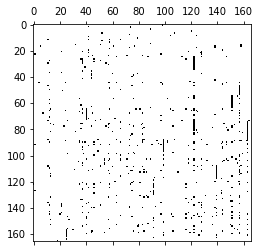

In [9]:
#M = sps.csr_matrix(df_truncate.iloc[order])
new_df = df_truncate.iloc[order]
plt.spy(new_df)
plt.show()

In [17]:
# df_truncate.to_csv("data.csv",header=False,index=False)

In [10]:
# aggiungiamo item fittizi per avere una matrice quadrata
# il problema è che aggiungengo troppi zeri si perde troppo utilità (NB gli item son 160)
zero_data_to_add = np.zeros(shape=(len(df_dummies),len(df_dummies)-len(columns)))
columns_to_add = [x for x in range(0,len(df_dummies)-len(columns))] 
df_to_add = pd.DataFrame(zero_data_to_add, columns=columns_to_add,dtype='uint8')


In [11]:
# quindi riduciamo il tutto a 200 righe e 200 colonne
df_new_complete = pd.concat([df_new, df_to_add], axis=1)
df_complete_200 = df_new_complete.iloc[:200,:200]


In [12]:
df_complete_200.to_csv("data_complete_200.csv",header=False,index=False)
df_complete_200.head()

,sliced cheese,semi-finished bread,jam,decalcifier,canned vegetables,flower soil/fertilizer,roll products,brandy,frozen chicken,ketchup,...,24,25,26,27,28,29,30,31,32,33
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
print(len(df_complete_200))
print(len(df_complete_200.iloc[1]))

200
200


In [15]:
df_new_complete.to_csv("data_complete.csv",header = False,index=False)